# Аналитика интернет-магазина

Вместе с отделом маркетинга необходимо подготовить список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

### Описание данных

#### Данные для первой части

Файл /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;  
- Reach — охват пользователей по 10-балльной шкале;  
- Impact — влияние на пользователей по 10-балльной шкале;  
- Confidence — уверенность в гипотезе по 10-балльной шкале;  
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части

Файл /datasets/orders.csv  
- transactionId — идентификатор заказа;  
- visitorId — идентификатор пользователя, совершившего заказ;  
- date — дата, когда был совершён заказ;  
- revenue — выручка заказа;  
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv  
- date — дата;  
- group — группа A/B-теста;  
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План выполнения:  
* Шаг 1. Загрузим данные;  
* Шаг 2. Приоритизируем гипотезы;  
* Шаг 3. Проанализируем A/B-тест;  
* Шаг 4. Напишем вывод

## Шаг 1. Загрузим данные.

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#hypothesis = pd.read_csv('hypothesis.csv')
#orders = pd.read_csv('orders.csv')
#visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

####  1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы (ICE):  
    - Запустить акцию, дающую скидку на товар; 
    - Добавить два новых канала привлечения трафика; 
    - Добавить форму подписки на все основные страницы;
    

#### 2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [9]:
hypothesis['RICE'] = (hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы (RICE):  
    - Добавить форму подписки на все основные страницы;
    - Добавить блоки рекомендаций товаров на сайт;
    - Добавить два новых канала привлечения трафика.

Применяя фреймворк RICE, две из трех популярных гипотез совпали с фреймворком ICE. Однако изменился их рейтинг. Также добавилась новая гипотеза. На эти изменения повлиял параметр Reach. У наиболее перспективных гипотез, этот параметр наибольший.

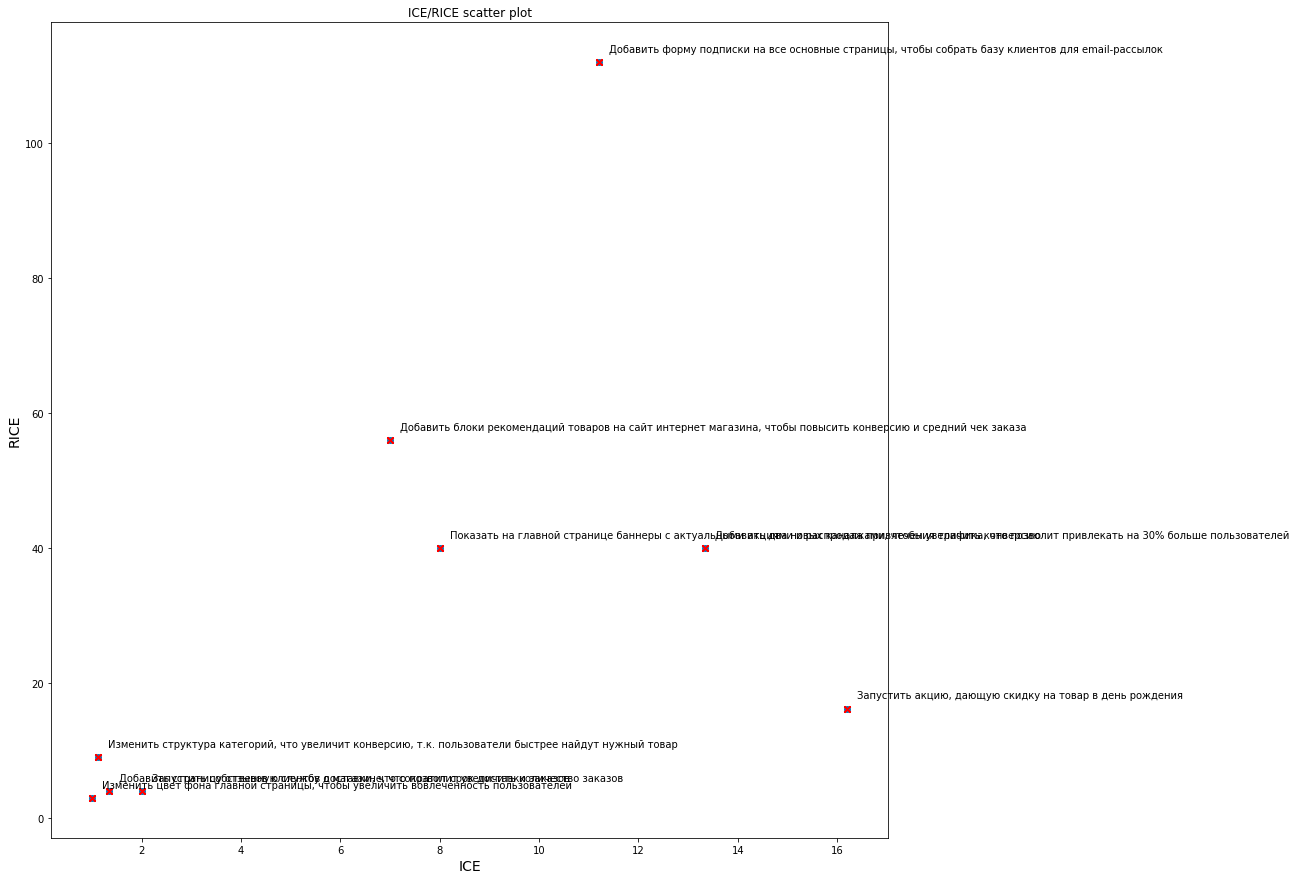

In [11]:
x = hypothesis['ICE'].values
y = hypothesis['RICE'].values
types = hypothesis.reset_index()['hypothesis'].values

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y)

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE/RICE scatter plot', fontsize=12)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')


## Шаг 2. Анализ A/B-теста. 

#### 1. Построем график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [12]:
datesGroups = orders[['date','group']].drop_duplicates()

In [13]:
users_status = (orders.groupby('visitorId')['group'].nunique() > 1).reset_index()
print(users_status)
damaged_users = users_status[users_status['group'] == True]['visitorId']
print('Количество пользователей в обоих группах: ', damaged_users.count())

       visitorId  group
0        5114589  False
1        6958315  False
2        8300375   True
3       11685486  False
4       39475350  False
...          ...    ...
1026  4266935830   True
1027  4278982564  False
1028  4279090005  False
1029  4281247801  False
1030  4283872382  False

[1031 rows x 2 columns]
Количество пользователей в обоих группах:  58


In [14]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [15]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [16]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

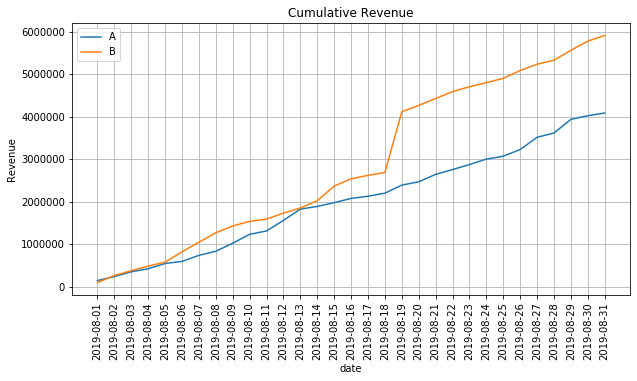

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title('Cumulative Revenue')
plt.xlabel('date')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()


В середине теста группа B вырвалась вперед и продолжала лидировать весь остаток теста. Вероятно, аномально большие заказы влияют на результат.

#### 2. Построем график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

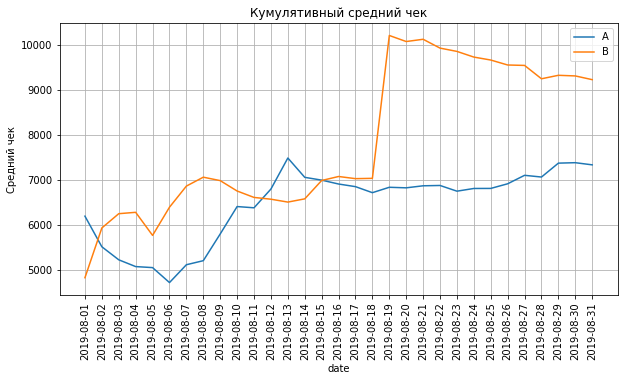

In [20]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек')
plt.xlabel('date')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)
plt.show()


Кумалятивное значение среднего чека по группам продолжает колебаться. Скорее всего, пинимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты. 

#### 3. Построем график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

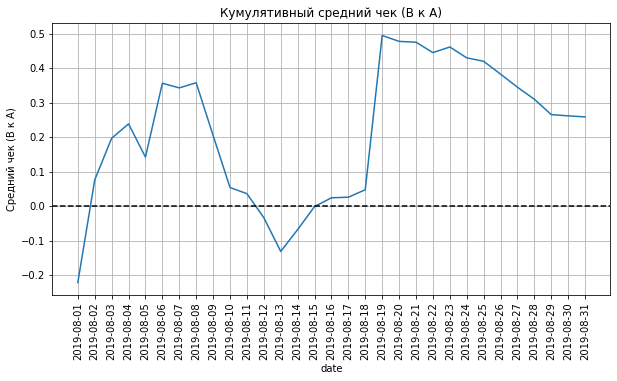

In [21]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Кумулятивный средний чек (B к A)')
plt.xlabel('date')
plt.ylabel('Средний чек (B к A)')
plt.xticks(rotation=90)
plt.show()


Результаты теста значительно и резко поменялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы. 

#### 4. Построем график кумулятивной конверсии по группам. Сделаем выводы и предположения.

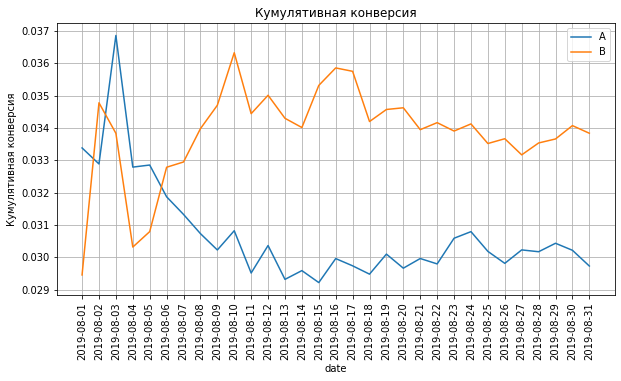

In [22]:
plt.figure(figsize=(10, 5))
plt.grid()
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия')
plt.xlabel('date')
plt.ylabel('Кумулятивная конверсия')
plt.xticks(rotation=90)
plt.show()

Вначале группа A лидировала по конверсии, но быстро уступила свои позиции группе B.

#### 5. Построем график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

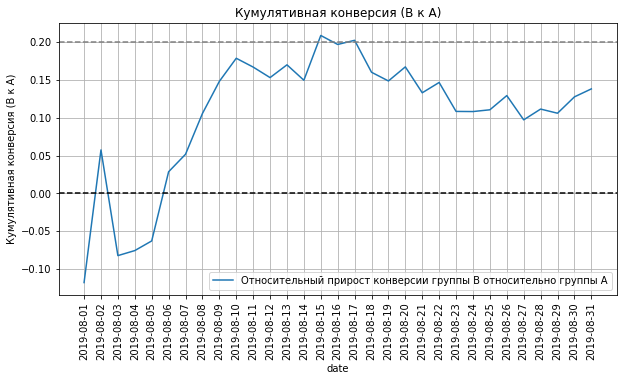

In [23]:
plt.figure(figsize=(10, 5))
plt.grid()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('Кумулятивная конверсия (B к A)')
plt.xlabel('date')
plt.ylabel('Кумулятивная конверсия (B к A)')
plt.xticks(rotation=90)
plt.show()


В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.

#### 6. Построем точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [24]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Кол-во пользователей')

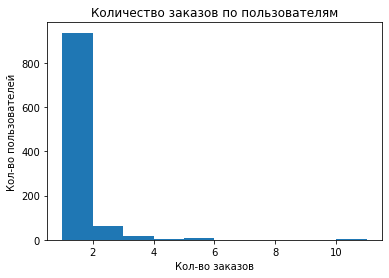

In [25]:
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во заказов')
plt.ylabel('Кол-во пользователей')

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.

Text(0, 0.5, 'Кол-во заказов')

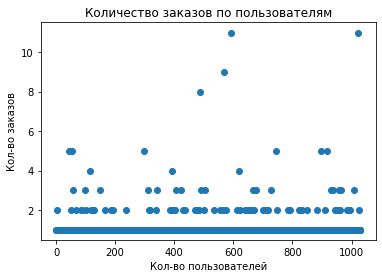

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')

Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. Не более 1% пользователей делали более 4 заказов.
Примем за аномальных пользователей тех, кто совершил от 4 заказов.

#### 8. Построем точечный график стоимостей заказов. Сделаем выводы и предположения.

Text(0, 0.5, 'Кол-во заказов')

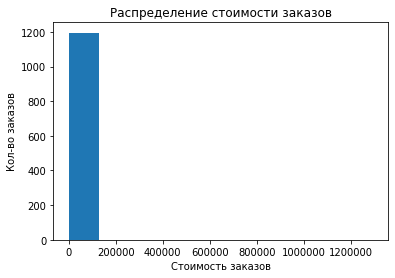

In [28]:
plt.hist(orders['revenue']) 
plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Кол-во заказов')

(0, 100000)

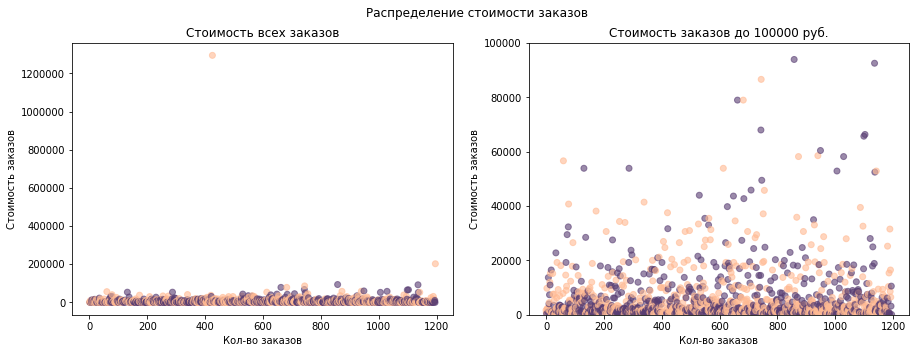

In [29]:
color_dict = {'A': '#583d72', 'B': '#ffba93'}
scatter_colors = orders['group'].map(color_dict)

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15, 5))
plt.suptitle('Распределение стоимости заказов')


plt.subplot(1, 2, 1)
plt.title('Стоимость всех заказов')
plt.scatter(x_values, orders['revenue'], color = scatter_colors, alpha=0.6) 
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость заказов')

          
plt.subplot(1, 2, 2)
plt.title('Стоимость заказов до 100000 руб.')
plt.scatter(x_values, orders['revenue'], color = scatter_colors, alpha=0.6) 
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость заказов')
plt.ylim(0,100000)


Основная масса заказов составляет до 80000 руб.

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [31]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28000 руб., не более 1% заказов дороже 58000 руб. Примем за аномальных пользователей тех, кто совершил заказ дороже 35 000 рублей.

#### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

Сформируем гипотезы:

<ul>
        <li>Нулевая гипотеза (H0) - Статистически значимых различий в конверсии между группами нет.</li>
        <li>Альтернативная гипотеза (H1) - Конверсии двух групп различаются</li>
        <li>Уровень статистической значимости - 0.05</li>
    </ul>    

In [32]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)) 

0.00840
0.138


Первое число — p-value = 0.00840 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.  
Относительный прирост конверсии группы B к конверсии группы A равен 14%. 

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформируем гипотезы:

<ul>
        <li>Нулевая гипотеза (H0) - Статистически значимых различий в среднем чеке заказа между группами по "сырым" данным нет.</li>
        <li>Альтернативная гипотеза (H1) - Средний чек заказа между группами по "сырым" данным различается.</li>
        <li>Уровень статистической значимости - 0.05</li>
    </ul>    

In [34]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет.  
Относительное различие среднего чека между сегментами 26%.

#### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформируем гипотезы:
<ul>
        <li>Нулевая гипотеза (H0) - Статистически значимых различий в конверсии между группами по "очищенным" данным нет.</li>
        <li>Альтернативная гипотеза (H1) - Конверсии двух групп по "очищенным" данным различаются.</li>
        <li>Уровень статистической значимости - 0.05</li>
    </ul>    

In [35]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00695
0.155


Результаты по конверсии практически не изменились.

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформируем гипотезы:
<ul>
        <li>Нулевая гипотеза (H0) - Статистически значимых различий в среднем чеке между группами по "очищенным" данным нет.</li>
        <li>Альтернативная гипотеза (H1) - Средний чек разных групп по "очищенным" данным различается.</li>
        <li>Уровень статистической значимости - 0.05</li>
    </ul>    

In [36]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.437
0.025


P-value увеличилось, но и разница между сегментами уменьшилась с 26% до 2,5%.  
Аномалии сильно повлияли на результат A/B Теста. 

#### 14. Примем решение по результатам теста и объясним его.

Имеющиеся факты:  
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения. 

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы.